In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Ice Cream Sales - temperatures.csv')
df.head(5)

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


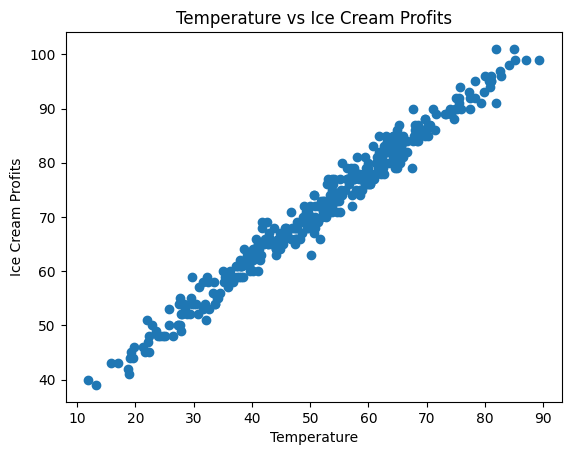

In [7]:
X = df["Ice Cream Profits"] # independent variable
y = df["Temperature"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("Temperature vs Ice Cream Profits")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Convert X to a numpy array and then reshape it to add a new axis
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

In [12]:
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

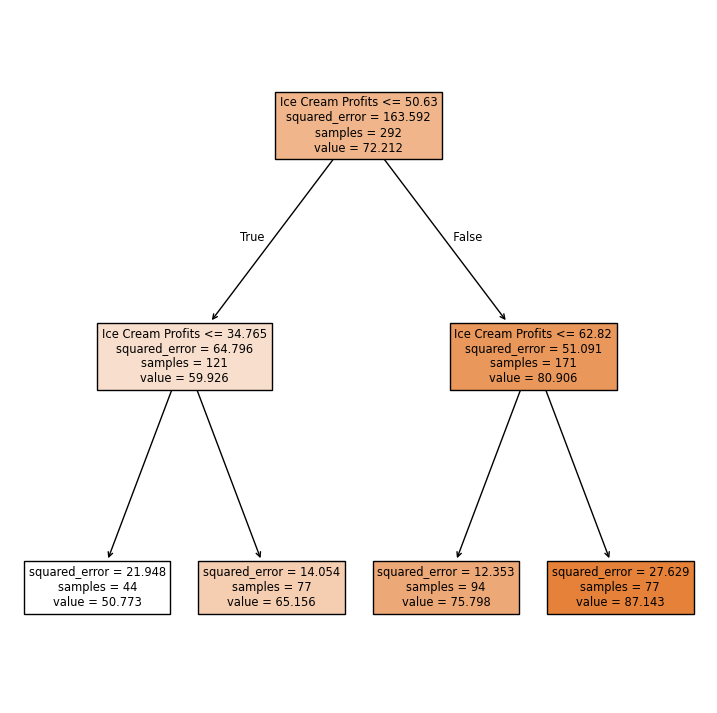

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree, feature_names=['Ice Cream Profits'],  filled=True)

In [14]:
from sklearn.metrics import mean_squared_error
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression decision tree model RMSE is:",np.sqrt(MSE))

Regression decision tree model RMSE is: 4.734974609348461


In [15]:
# Generate a range of equidistant points along the x-axis spanning from the minimum
# to the maximum X-values in the dataset, consisting of 100 points.
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis]

In [16]:
# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)

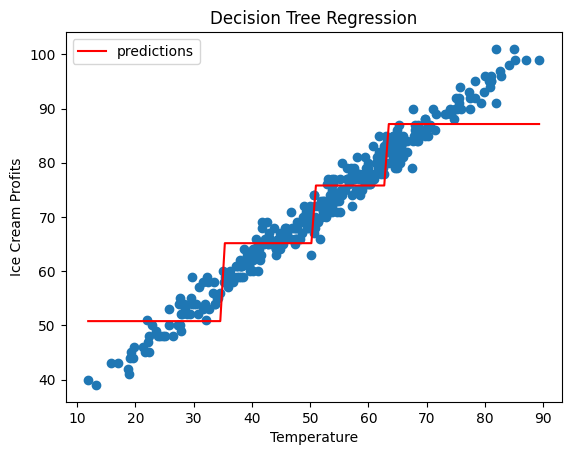

In [17]:
# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()